In [150]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/seoul-bike-sharing-demand-prediction/SeoulBikeData.csv


In [151]:
#Predict the bike count required at each hour for rental using its multiple feature like
#weather conditions, time, date, holidays like so on
#This is south korea data

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [153]:
df = pd.read_csv('/kaggle/input/seoul-bike-sharing-demand-prediction/SeoulBikeData.csv', encoding= 'unicode_escape')
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [154]:
df.shape

(8760, 14)

In [155]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [156]:
df.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [157]:
df.count()

Date                         8760
Rented Bike Count            8760
Hour                         8760
Temperature(°C)              8760
Humidity(%)                  8760
Wind speed (m/s)             8760
Visibility (10m)             8760
Dew point temperature(°C)    8760
Solar Radiation (MJ/m2)      8760
Rainfall(mm)                 8760
Snowfall (cm)                8760
Seasons                      8760
Holiday                      8760
Functioning Day              8760
dtype: int64

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [159]:
df.describe(include='all').T

count unique         top  freq         mean  \
Date                         8760    365  01/12/2017    24          NaN   
Rented Bike Count          8760.0    NaN         NaN   NaN   704.602055   
Hour                       8760.0    NaN         NaN   NaN         11.5   
Temperature(°C)            8760.0    NaN         NaN   NaN    12.882922   
Humidity(%)                8760.0    NaN         NaN   NaN    58.226256   
Wind speed (m/s)           8760.0    NaN         NaN   NaN     1.724909   
Visibility (10m)           8760.0    NaN         NaN   NaN  1436.825799   
Dew point temperature(°C)  8760.0    NaN         NaN   NaN     4.073813   
Solar Radiation (MJ/m2)    8760.0    NaN         NaN   NaN     0.569111   
Rainfall(mm)               8760.0    NaN         NaN   NaN     0.148687   
Snowfall (cm)              8760.0    NaN         NaN   NaN     0.075068   
Seasons                      8760      4      Spring  2208          NaN   
Holiday                      8760      2  No Holiday  8328          NaN   
Functioning Day              8760      2         Yes  8465          NaN   

                                  std   min    25%     50%      75%     max  
Date                              NaN   NaN    NaN     NaN      NaN     NaN  
Rented Bike Count          644.997468   0.0  191.0   504.5  1065.25  3556.0  
Hour                         6.922582   0.0   5.75    11.5    17.25    23.0  
Temperature(°C)             11.944825 -17.8    3.5    13.7     22.5    39.4  
Humidity(%)                 20.362413   0.0   42.0    57.0     74.0    98.0  
Wind speed (m/s)               1.0363   0.0    0.9     1.5      2.3     7.4  
Visibility (10m)           608.298712  27.0  940.0  1698.0   2000.0  2000.0  
Dew point temperature(°C)   13.060369 -30.6   -4.7     5.1     14.8    27.2  
Solar Radiation (MJ/m2)      0.868746   0.0    0.0    0.01     0.93    3.52  
Rainfall(mm)                 1.128193   0.0    0.0     0.0      0.0    35.0  
Snowfall (cm)                0.436746   0.0    0.0     0.0      0.0     8.8  
Seasons                           NaN   NaN    NaN     NaN      NaN     NaN  
Holiday                           NaN   NaN    NaN     NaN      NaN     NaN  
Functioning Day                   NaN   NaN    NaN     NaN      NaN     NaN

In [160]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [161]:
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [162]:
df['Date'] = pd.to_datetime(df['Date'], format='mixed')

# Extract date components
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['WeekDay'] = df['Date'].dt.day_name()
df.drop("Date",axis=1, inplace=True)

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  Year                       8760 non-null   int32

In [164]:
# Check for duplicated entries.
print("Duplicate entry in data:",len(df[df.duplicated()])) 

Duplicate entry in data: 0


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  Year                       8760 non-null   int32

**EDA**

<Axes: xlabel='Seasons', ylabel='Rented Bike Count'>

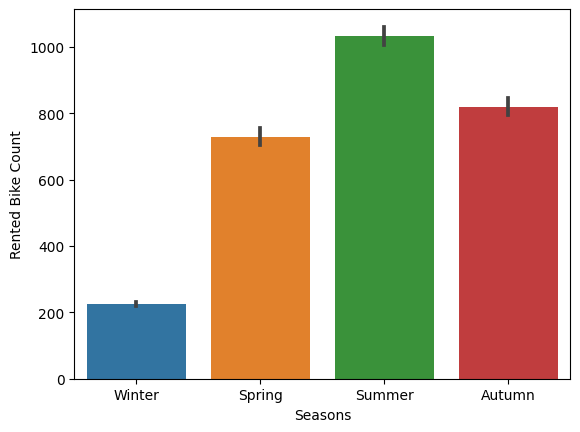

In [166]:
sns.barplot(data=df, x='Seasons', y='Rented Bike Count')

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  Year                       8760 non-null   int32

**EDA**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

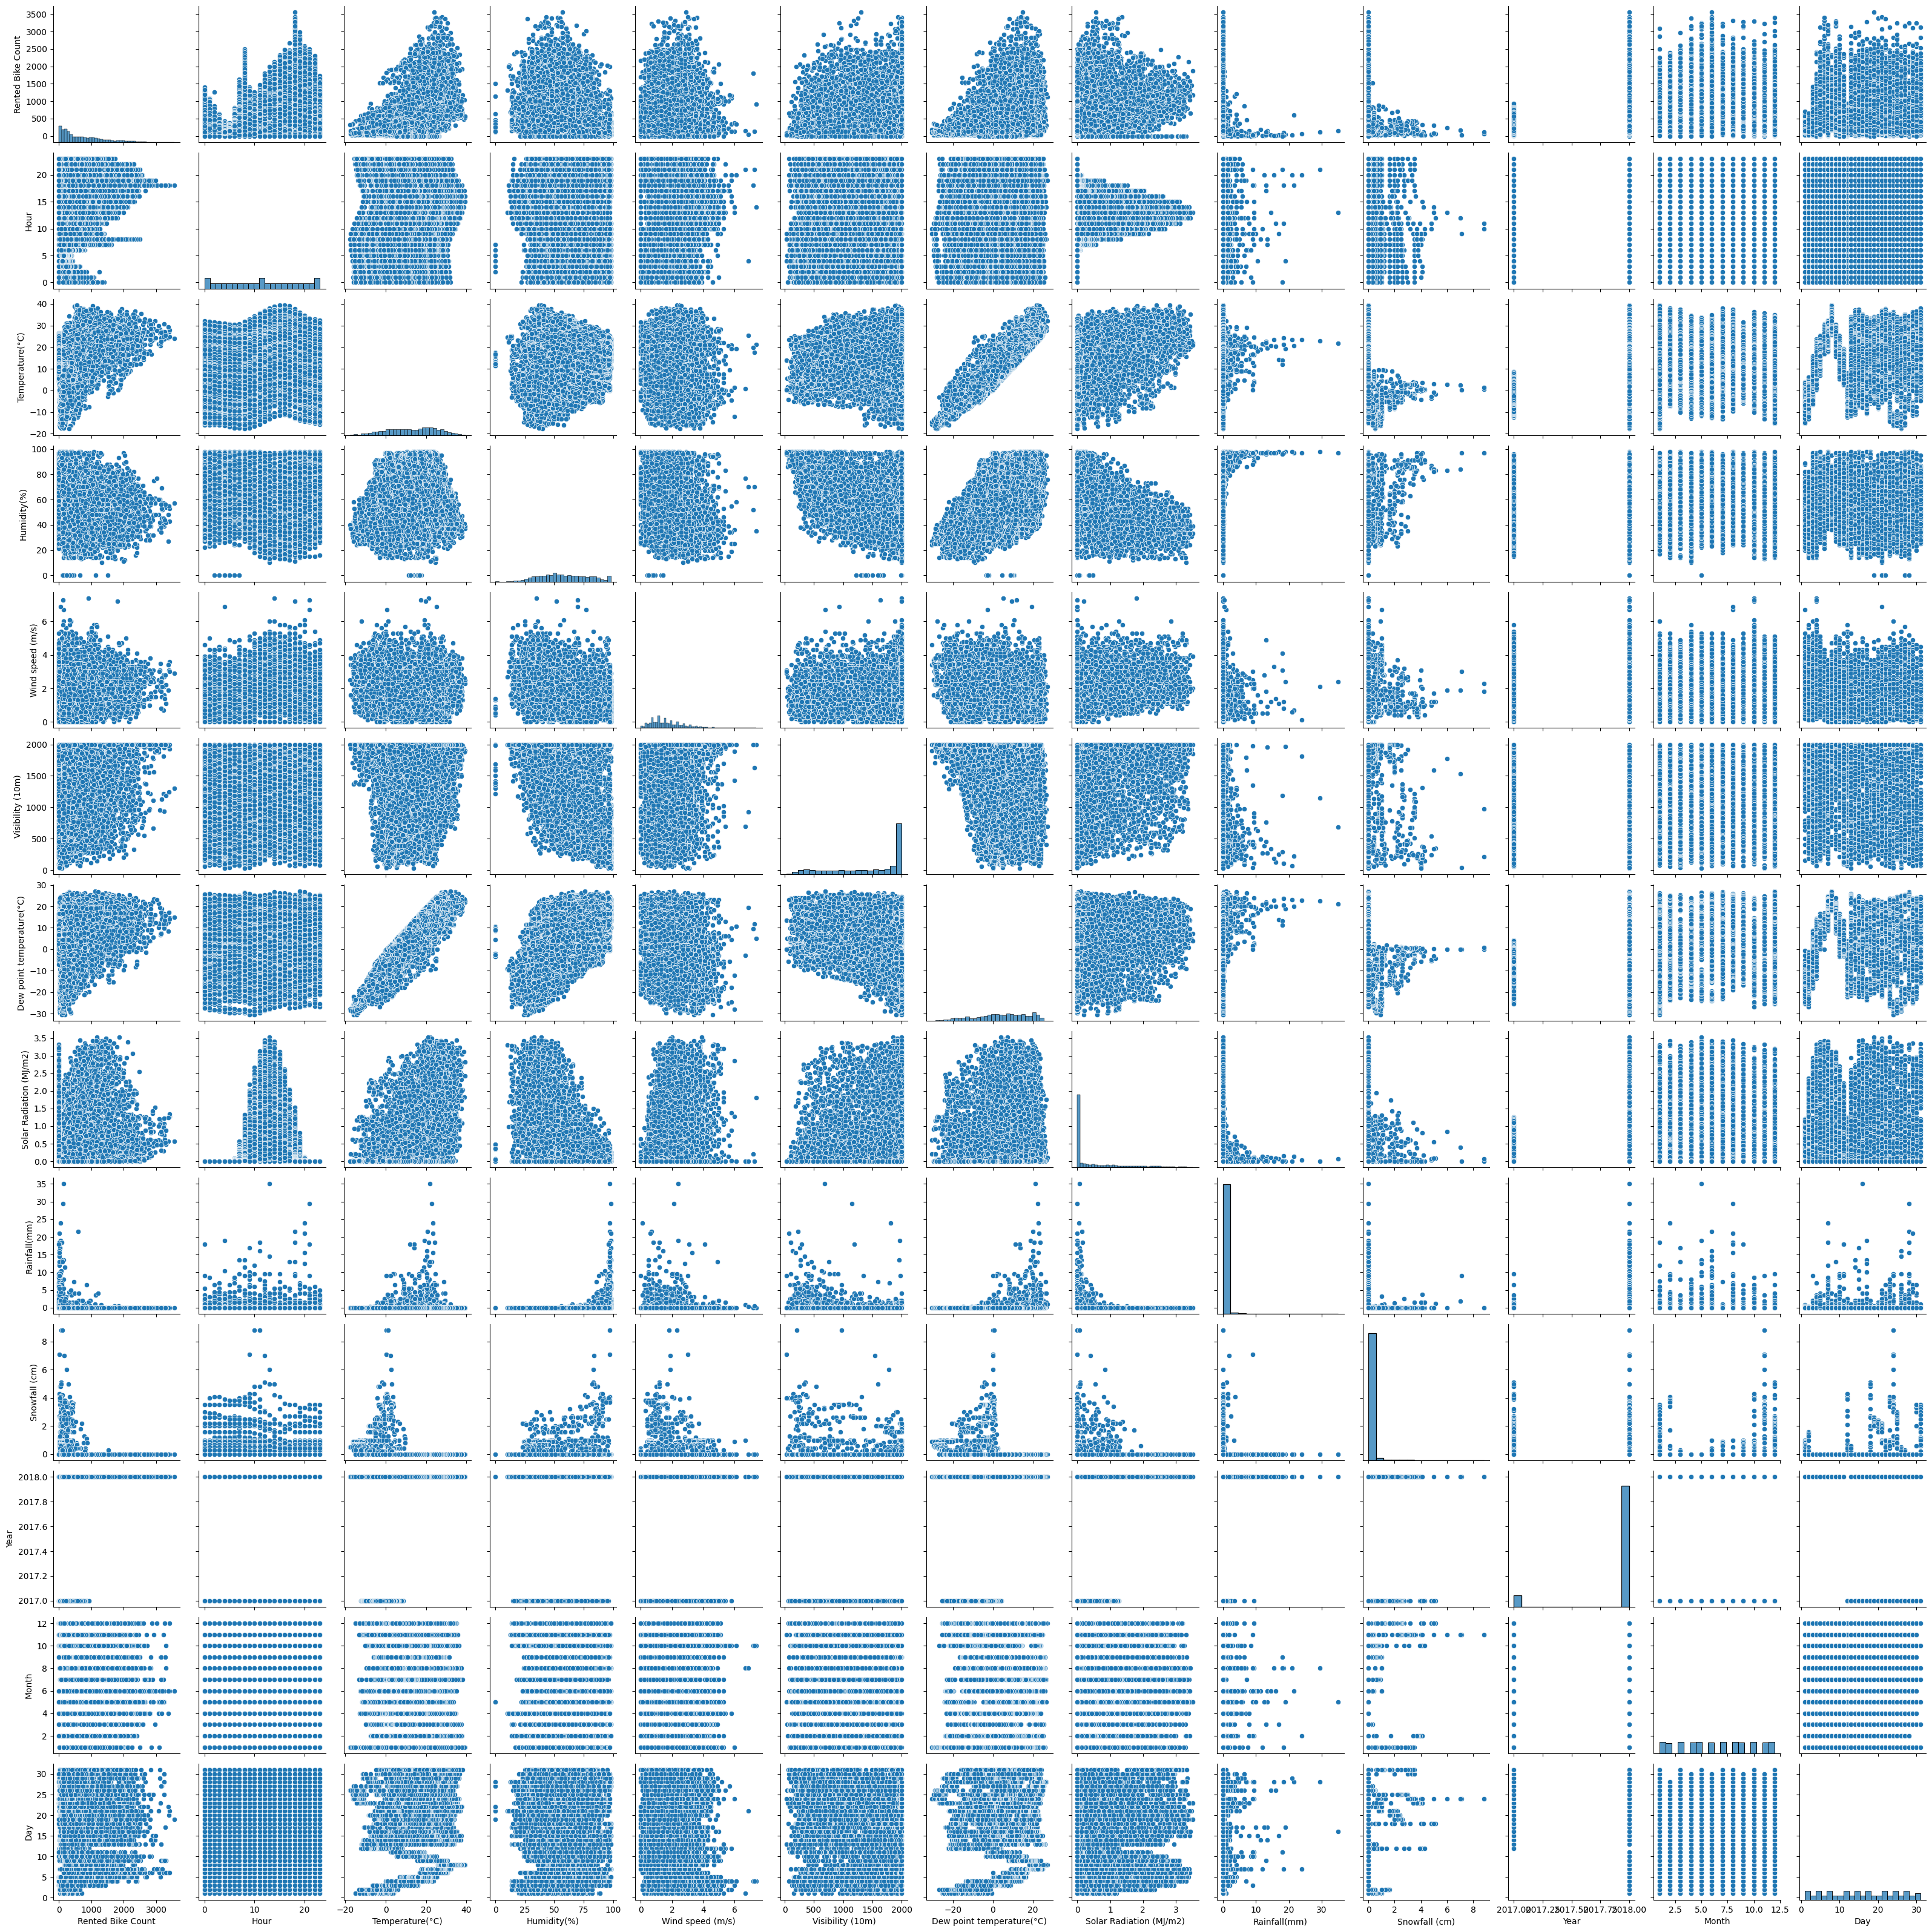

In [168]:
import warnings
sns.pairplot(df)

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  Year                       8760 non-null   int32

<Axes: >

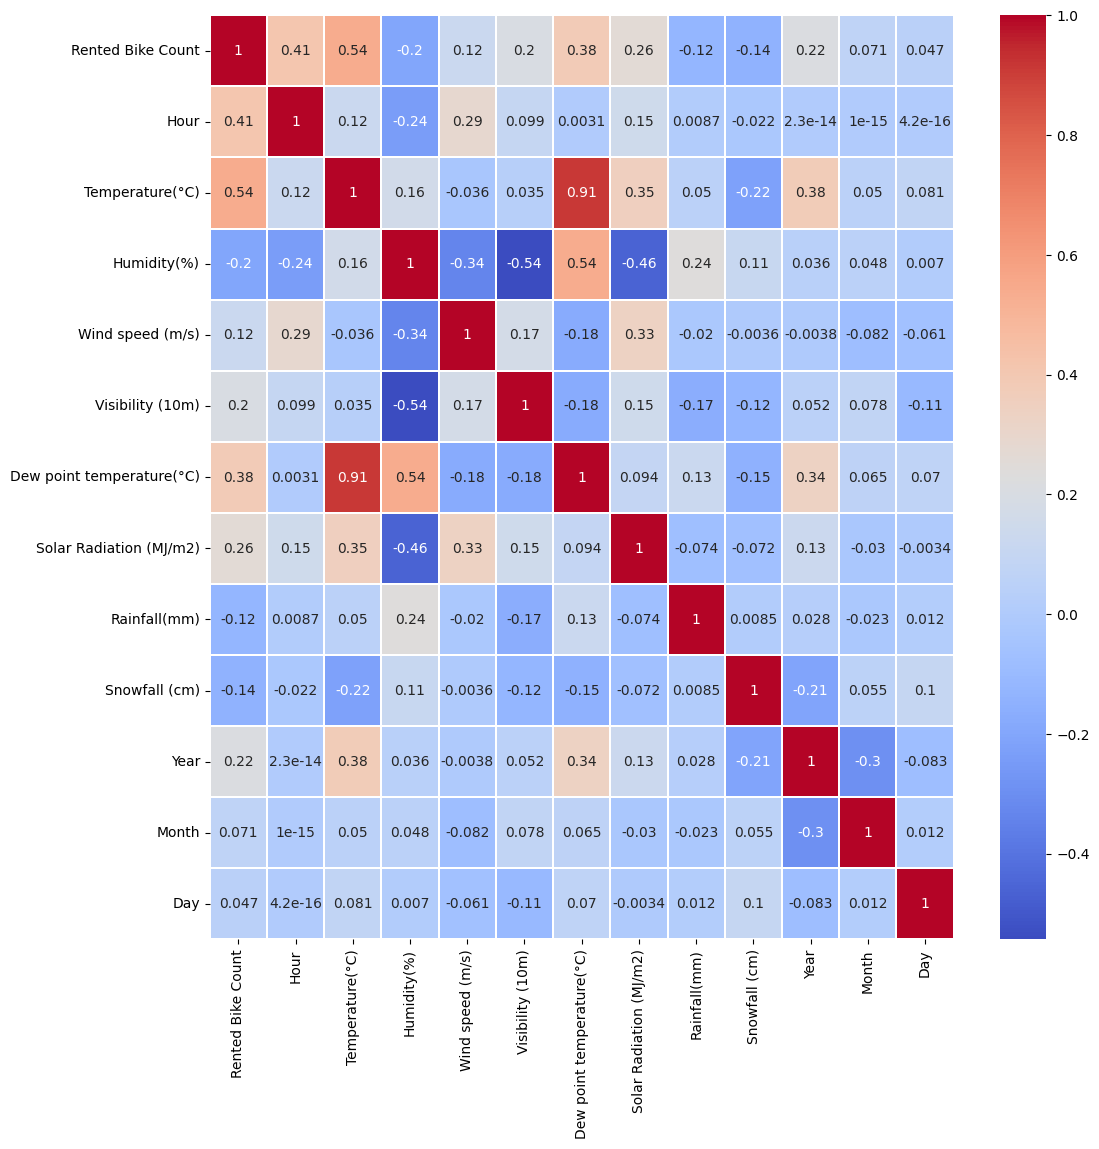

In [170]:
# We have 3 parameters only in this method=['kendal', 'pearson', 'spearman'],
# min_periods= 3 and numeric_only=[True or False]
data_corr= df.corr(numeric_only=True)      
plt.figure(figsize=(12,12))
sns.heatmap(data_corr, cmap='coolwarm', linewidths=0.1, annot=True, linecolor='white')

[]

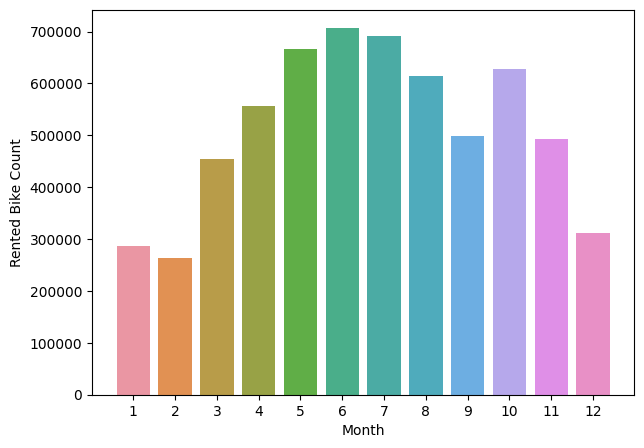

In [171]:
# df.groupby(by=None, axis=_NoDefault.no_default, level=None, as_index=True, 
#                   sort=True, group_keys=True, observed=_NoDefault.no_default, dropna=True)
# Month = df.groupby('Month').sum().reset_index()
# Group by 'Month' and aggregate sum of numeric columns (e.g., 'Amount')
plt.figure(figsize=(7,5))
Month = df.groupby('Month').sum().reset_index()
sns.barplot(data=Month, x='Month', y='Rented Bike Count')
#print(Month)
plt.plot()


[]

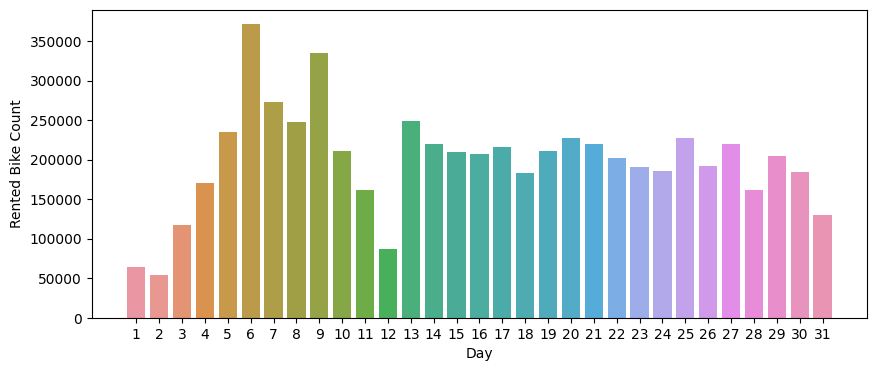

In [172]:
plt.figure(figsize=(10,4))
Day = df.groupby('Day').sum().reset_index()
sns.barplot(data=Day, x='Day', y='Rented Bike Count')
plt.plot()

[]

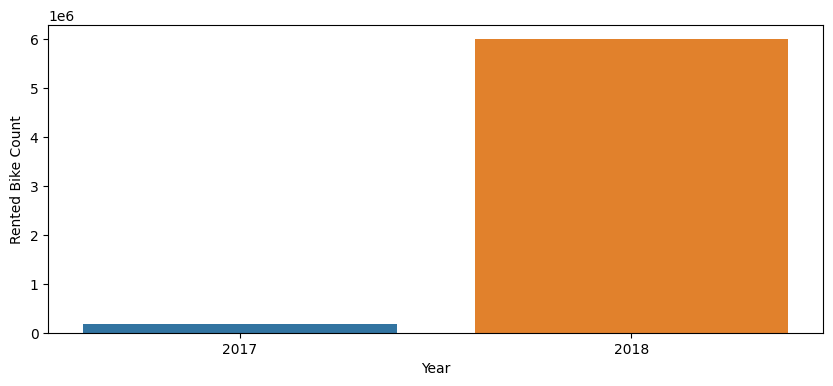

In [173]:
plt.figure(figsize=(10,4))
Year = df.groupby('Year').sum().reset_index()
sns.barplot(data=Year, x='Year', y='Rented Bike Count')
plt.plot()

[]

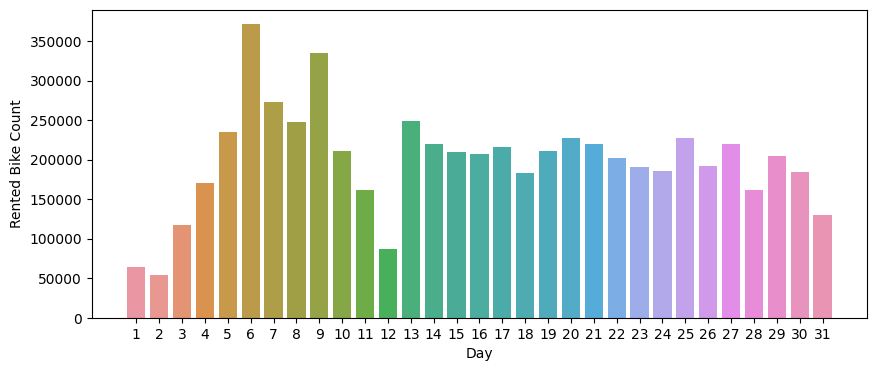

In [174]:
plt.figure(figsize=(10,4))
Day = df.groupby('Day').sum().reset_index()
sns.barplot(data=Day, x='Day', y='Rented Bike Count')
plt.plot()

[]

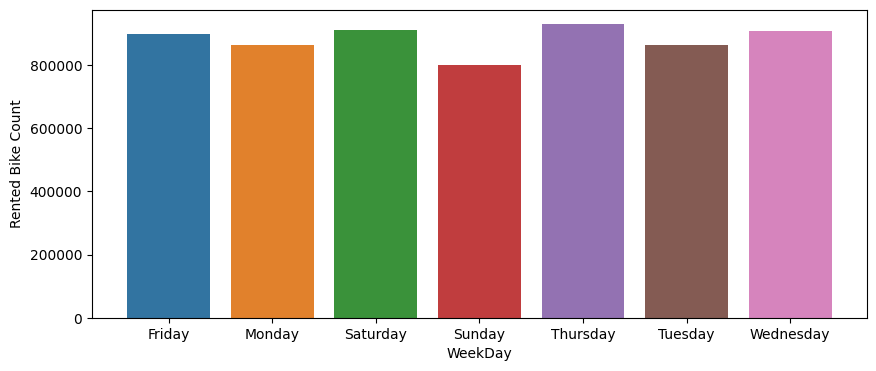

In [175]:
plt.figure(figsize=(10,4))
WeekDay = df.groupby('WeekDay').sum().reset_index()
sns.barplot(data=WeekDay, x='WeekDay', y='Rented Bike Count')
plt.plot()


[]

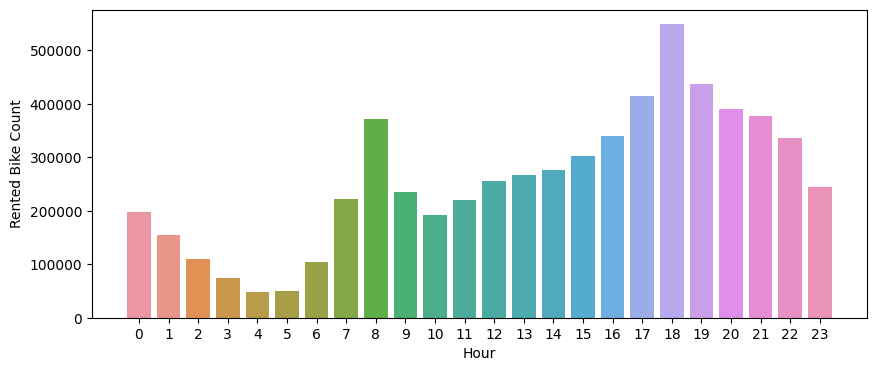

In [176]:
plt.figure(figsize=(10,4))
Hour = df.groupby('Hour').sum().reset_index()
sns.barplot(data=Hour, x='Hour', y='Rented Bike Count')
plt.plot()


[]

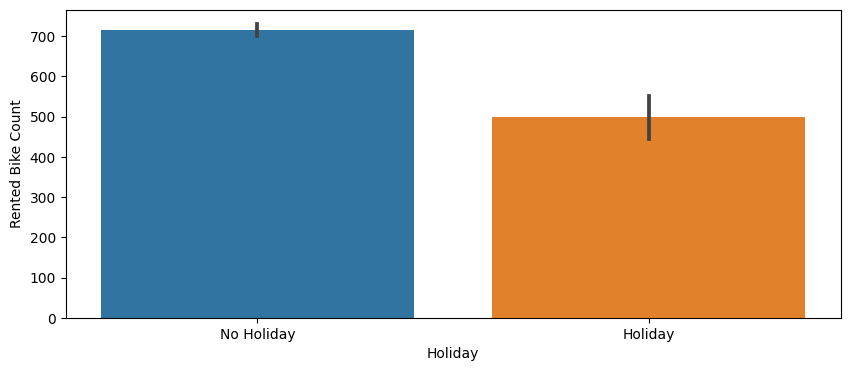

In [177]:
plt.figure(figsize=(10,4))
sns.barplot(data=df, x='Holiday', y='Rented Bike Count')
plt.plot()

[]

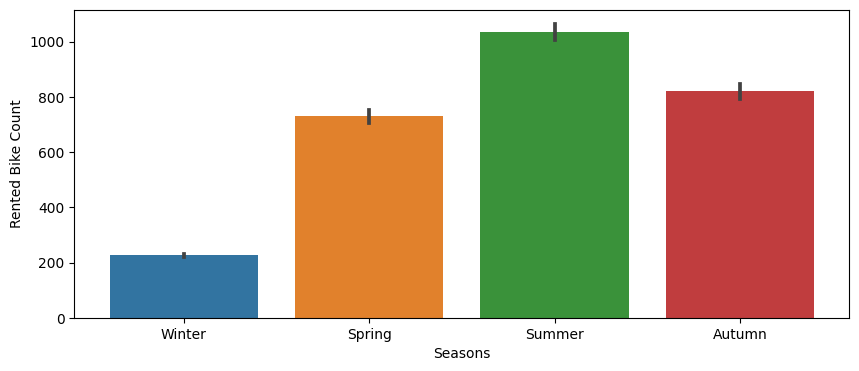

In [178]:
plt.figure(figsize=(10,4))
sns.barplot(data=df, x='Seasons', y='Rented Bike Count')
plt.plot()

[]

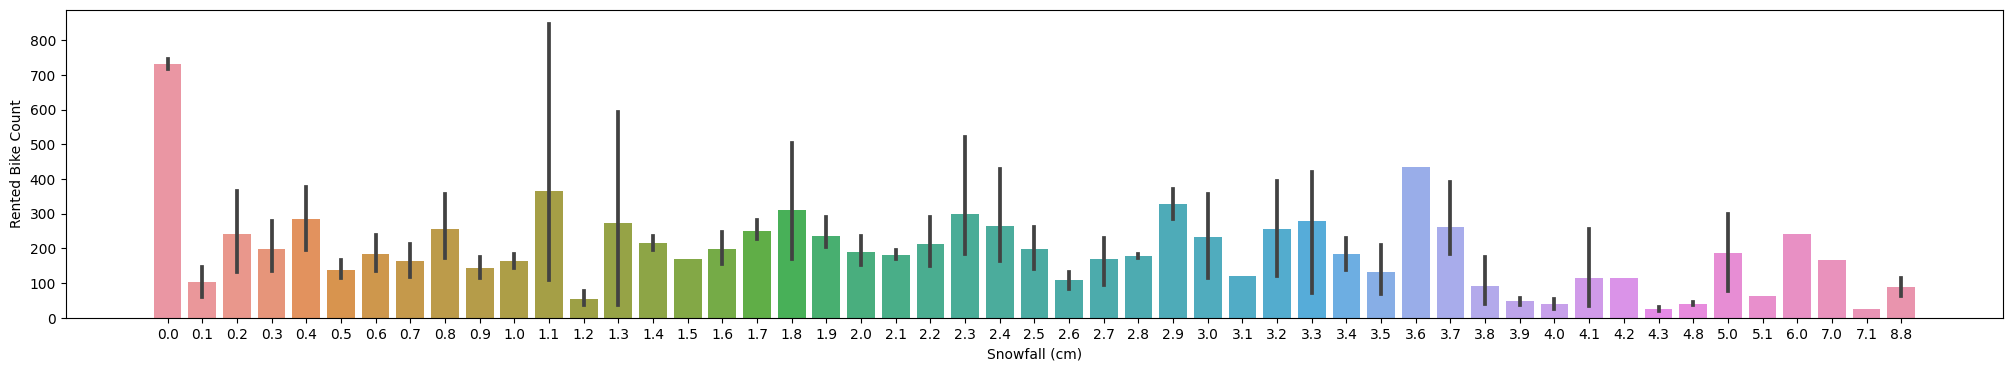

In [179]:
plt.figure(figsize=(25,4))
sns.barplot(data=df, x='Snowfall (cm)', y='Rented Bike Count')
plt.plot()

[]

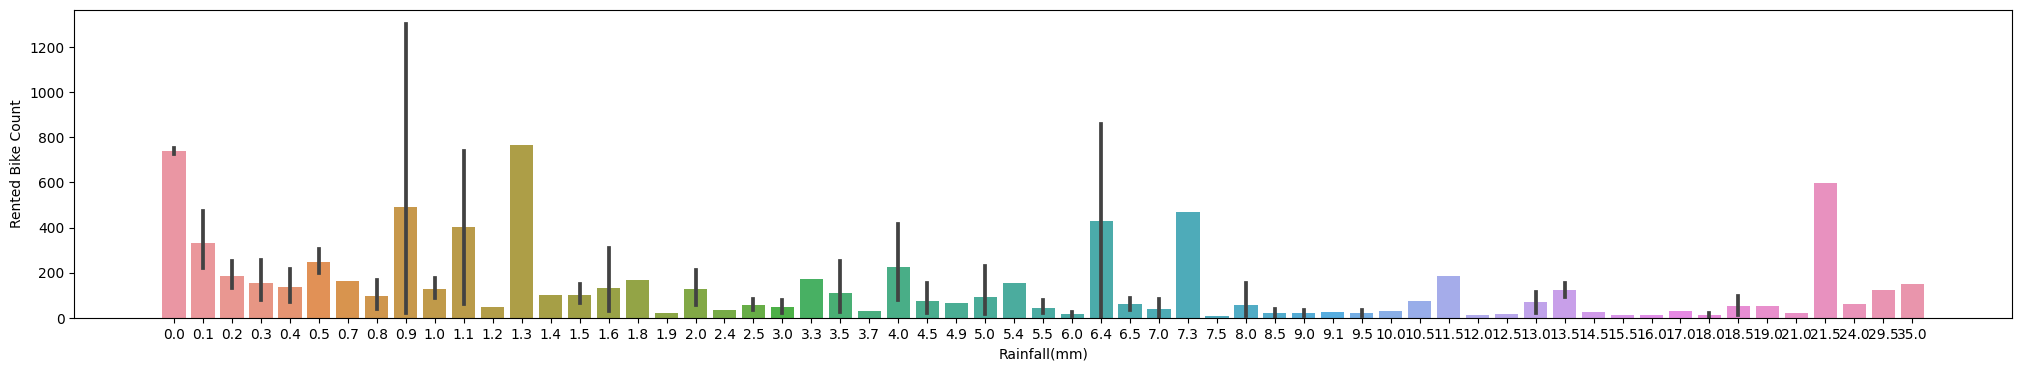

In [180]:
plt.figure(figsize=(25,4))
sns.barplot(data=df, x='Rainfall(mm)', y='Rented Bike Count')
plt.plot()

[]

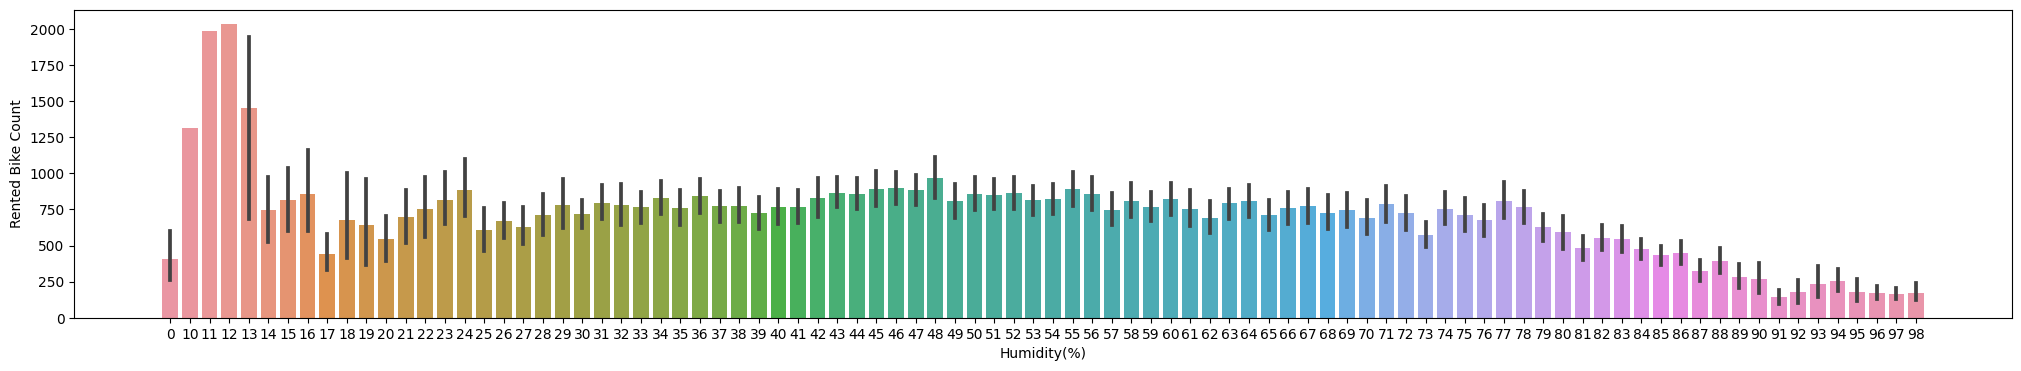

In [181]:
plt.figure(figsize=(25,4))
sns.barplot(data=df, x='Humidity(%)', y='Rented Bike Count')
plt.plot()


1.Histplot is a function used to create histograms which are graphical representations of the distribution of numerical data 2.Distplot is a combination of a histogram with a line (density plot) on it

/tmp/ipykernel_33/2816427527.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(df['Rented Bike Count'], kde=True, bins=20, palette='pastel')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[]

<Figure size 2500x400 with 0 Axes>

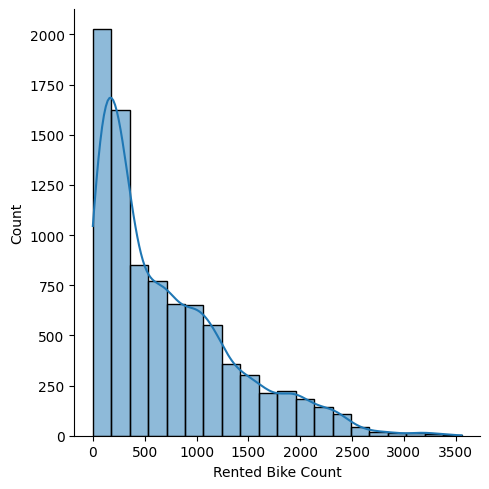

In [182]:
plt.figure(figsize=(25,4))
#sns.histplot(df['Rented Bike Count'])
sns.displot(df['Rented Bike Count'], kde=True, bins=20, palette='pastel')
plt.plot()

/tmp/ipykernel_33/1919500463.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(np.sqrt(df['Rented Bike Count']), kde=True, bins=20, palette='pastel')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


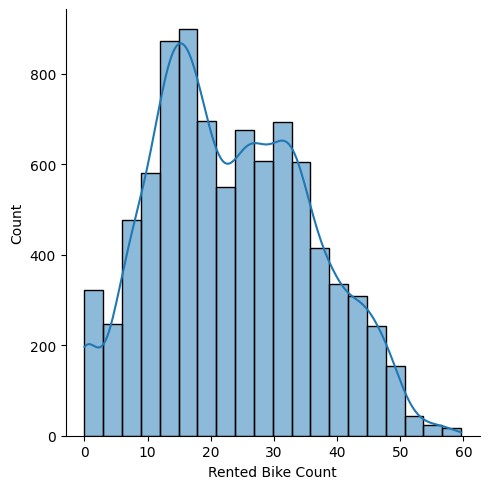

In [183]:
#sns.displot(np.sqrt(df['Rented Bike Count']))
sns.displot(np.sqrt(df['Rented Bike Count']), kde=True, bins=20, palette='pastel')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


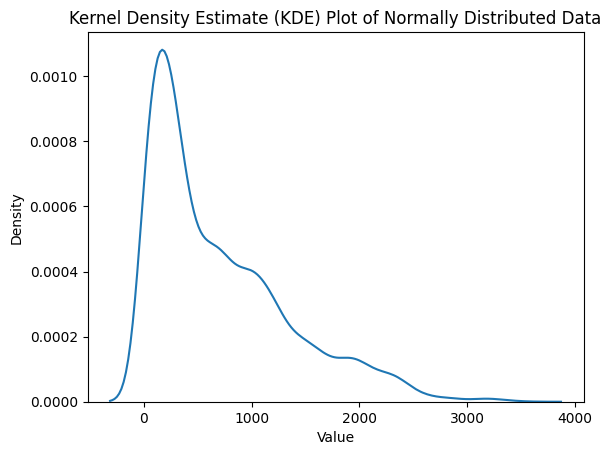

In [184]:
sns.kdeplot(data=df['Rented Bike Count'])
plt.title('Kernel Density Estimate (KDE) Plot of Normally Distributed Data')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

**Skewed Data**

In [185]:
df.skew(numeric_only=True).sort_values(ascending=True)

Year                         -2.978262
Visibility (10m)             -0.701786
Dew point temperature(°C)    -0.367298
Temperature(°C)              -0.198326
Month                        -0.010458
Hour                          0.000000
Day                           0.007522
Humidity(%)                   0.059579
Wind speed (m/s)              0.890955
Rented Bike Count             1.153428
Solar Radiation (MJ/m2)       1.504040
Snowfall (cm)                 8.440801
Rainfall(mm)                 14.533232
dtype: float64

**Multi-collinearity**

<Axes: >

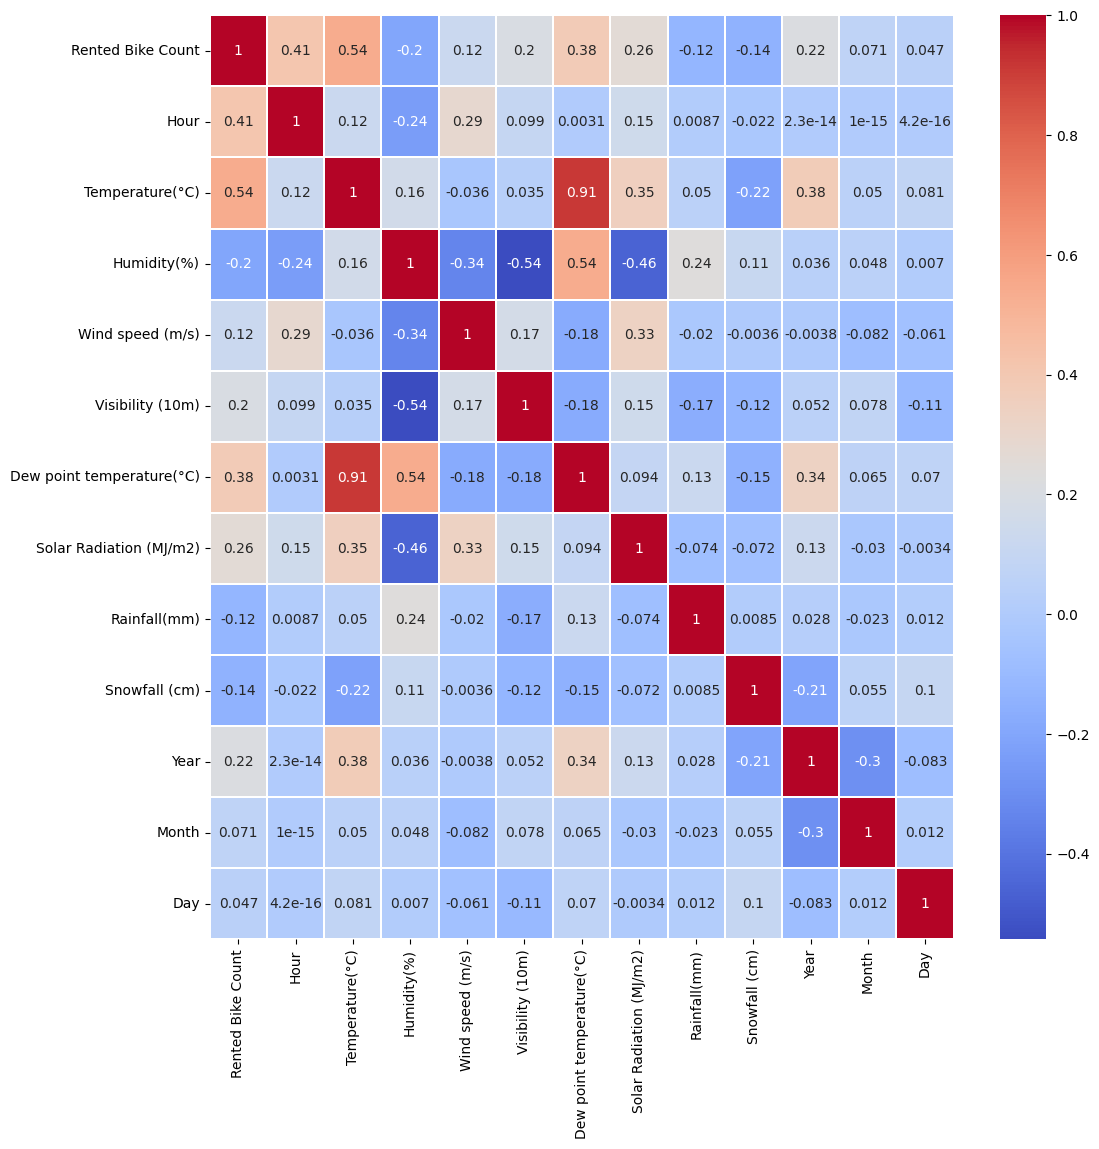

In [186]:
# We have 3 parameters only in this method=['kendal', 'pearson', 'spearman'],
# min_periods= 3 and numeric_only=[True or False]
data_corr= df.corr(numeric_only=True)      
plt.figure(figsize=(12,12))
sns.heatmap(data_corr, cmap='coolwarm', linewidths=0.1, annot=True, linecolor='white')

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  Year                       8760 non-null   int32

VIF -Variance Inflation factor

VIF measures the strength of the correlation between the independent variables in regression analysis. This correlation is known as multicollinearity

In [188]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [189]:
def get_vif(df):
    vif=pd.DataFrame()
    vif["variables"]=df.columns
    vif["VIF"]=[variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif

In [190]:
not_for_vif=['Day','Month','Year','Rented Bike Count']
get_vif(df[[i for i in df.describe().columns if i not in not_for_vif]])

variables        VIF
0                       Hour   4.418242
1            Temperature(°C)  33.385256
2                Humidity(%)   5.371996
3           Wind speed (m/s)   4.805364
4           Visibility (10m)   9.085977
5  Dew point temperature(°C)  17.126199
6    Solar Radiation (MJ/m2)   2.881590
7               Rainfall(mm)   1.081567
8              Snowfall (cm)   1.120833

In [191]:
# df[[i for i in df.describe().columns if i not in not_for_vif]]

*drop=Dew point temperature(°C)*

In [192]:
not_for_vif=['Day','Month','Year','Rented Bike Count','Dew point temperature(°C)']
get_vif(df[[i for i in df.describe().columns if i not in not_for_vif]])

variables       VIF
0                     Hour  3.921832
1          Temperature(°C)  3.228318
2              Humidity(%)  4.868221
3         Wind speed (m/s)  4.608625
4         Visibility (10m)  4.710170
5  Solar Radiation (MJ/m2)  2.246791
6             Rainfall(mm)  1.079158
7            Snowfall (cm)  1.120579

In [193]:
df.drop('Dew point temperature(°C)', axis=1, inplace=True)

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Seasons                  8760 non-null   object 
 10  Holiday                  8760 non-null   object 
 11  Functioning Day          8760 non-null   object 
 12  Year                     8760 non-null   int32  
 13  Month                    8760 non-null   int32  
 14  Day                     

In [195]:
categories_features=['Seasons','Holiday','WeekDay' 'Functioning Day']

In [196]:
df['Seasons'].value_counts()

Seasons
Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: count, dtype: int64

In [197]:
df['Holiday'].value_counts()

Holiday
No Holiday    8328
Holiday        432
Name: count, dtype: int64

In [198]:
df['Functioning Day'].value_counts()

Functioning Day
Yes    8465
No      295
Name: count, dtype: int64

In [199]:
df['WeekDay'].value_counts()

WeekDay
Sunday       1296
Wednesday    1272
Tuesday      1272
Thursday     1248
Saturday     1248
Friday       1224
Monday       1200
Name: count, dtype: int64

**OHE**

In [200]:
df['Holiday'] = df['Holiday'].map({'No Holiday': 0, 'Holiday': 1})
df['Functioning Day'] = df['Functioning Day'].map({'No': 0, 'Yes': 1})

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Seasons                  8760 non-null   object 
 10  Holiday                  8760 non-null   int64  
 11  Functioning Day          8760 non-null   int64  
 12  Year                     8760 non-null   int32  
 13  Month                    8760 non-null   int32  
 14  Day                     

In [202]:
df

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                   254     0             -5.2           37               2.2   
1                   204     1             -5.5           38               0.8   
2                   173     2             -6.0           39               1.0   
3                   107     3             -6.2           40               0.9   
4                    78     4             -6.0           36               2.3   
...                 ...   ...              ...          ...               ...   
8755               1003    19              4.2           34               2.6   
8756                764    20              3.4           37               2.3   
8757                694    21              2.6           39               0.3   
8758                712    22              2.1           41               1.0   
8759                584    23              1.9           43               1.3   

      Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0                 2000                      0.0           0.0            0.0   
1                 2000                      0.0           0.0            0.0   
2                 2000                      0.0           0.0            0.0   
3                 2000                      0.0           0.0            0.0   
4                 2000                      0.0           0.0            0.0   
...                ...                      ...           ...            ...   
8755              1894                      0.0           0.0            0.0   
8756              2000                      0.0           0.0            0.0   
8757              1968                      0.0           0.0            0.0   
8758              1859                      0.0           0.0            0.0   
8759              1909                      0.0           0.0            0.0   

     Seasons  Holiday  Functioning Day  Year  Month  Day   WeekDay  
0     Winter        0                1  2017      1   12  Thursday  
1     Winter        0                1  2017      1   12  Thursday  
2     Winter        0                1  2017      1   12  Thursday  
3     Winter        0                1  2017      1   12  Thursday  
4     Winter        0                1  2017      1   12  Thursday  
...      ...      ...              ...   ...    ...  ...       ...  
8755  Autumn        0                1  2018     11   30    Friday  
8756  Autumn        0                1  2018     11   30    Friday  
8757  Autumn        0                1  2018     11   30    Friday  
8758  Autumn        0                1  2018     11   30    Friday  
8759  Autumn        0                1  2018     11   30    Friday  

[8760 rows x 16 columns]

In [203]:
df_season= pd.get_dummies(df['Seasons'], drop_first=True)
df_weekday= pd.get_dummies(df['WeekDay'], drop_first=True) 

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Seasons                  8760 non-null   object 
 10  Holiday                  8760 non-null   int64  
 11  Functioning Day          8760 non-null   int64  
 12  Year                     8760 non-null   int32  
 13  Month                    8760 non-null   int32  
 14  Day                     

In [205]:
df=pd.concat([df, df_season, df_weekday], axis=1)

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Seasons                  8760 non-null   object 
 10  Holiday                  8760 non-null   int64  
 11  Functioning Day          8760 non-null   int64  
 12  Year                     8760 non-null   int32  
 13  Month                    8760 non-null   int32  
 14  Day                     

In [207]:
df.drop(["Seasons", "WeekDay"], axis=1, inplace=True)

In [208]:
df.shape

(8760, 23)

**Split data for training and testing**

In [209]:
df.head(2)

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   

   Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0              2000                      0.0           0.0            0.0   
1              2000                      0.0           0.0            0.0   

   Holiday  ...  Day  Spring  Summer  Winter  Monday  Saturday  Sunday  \
0        0  ...   12   False   False    True   False     False   False   
1        0  ...   12   False   False    True   False     False   False   

   Thursday  Tuesday  Wednesday  
0      True    False      False  
1      True    False      False  

[2 rows x 23 columns]

In [210]:
x=df.drop('Rented Bike Count', axis=1)
y=df['Rented Bike Count']

In [211]:
from sklearn.model_selection import train_test_split

In [212]:
x_train, x_test,y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=2024)
print('Shape of x_train :', x_train.shape)
print('Shape of y_train :', y_train.shape)
print('Shape of x_test :', x_test.shape)
print('Shape of y_test :', y_test.shape)

Shape of x_train : (7008, 22)
Shape of y_train : (7008,)
Shape of x_test : (1752, 22)
Shape of y_test : (1752,)


**Scaling**

In [213]:
from sklearn.preprocessing import StandardScaler

In [214]:
sc = StandardScaler()

sc.fit(x_train)
x_train = sc.transform(x_train)

x_test = sc.transform(x_test)

In [215]:
x_train[:2]

array([[ 0.5069713 ,  0.62514297,  1.5531619 , -0.80012844, -0.12166794,
        -0.26950288, -0.13595994, -0.17477199, -0.22720178,  0.18503645,
         0.30766527,  0.72108235, -0.99814379, -0.57998659,  1.72744953,
        -0.5793275 , -0.40296628, -0.40821431, -0.41626885, -0.40892769,
        -0.41461591, -0.40987803],
       [ 0.65219324, -0.53604016, -0.50044537,  0.83123967,  0.84498538,
        -0.40827069, -0.13595994, -0.17477199, -0.22720178,  0.18503645,
        -3.25028559, -1.3016427 , -0.42829632, -0.57998659, -0.57888812,
         1.72613935, -0.40296628, -0.40821431,  2.40229359, -0.40892769,
        -0.41461591, -0.40987803]])

In [216]:
sc.mean_

array([1.15089897e+01, 1.28166952e+01, 5.82350171e+01, 1.73378995e+00,
       1.43013456e+03, 5.73053653e-01, 1.47930936e-01, 7.94377854e-02,
       4.90867580e-02, 9.66894977e-01, 2.01791353e+03, 6.50456621e+00,
       1.57579909e+01, 2.51712329e-01, 2.50998858e-01, 2.51284247e-01,
       1.39697489e-01, 1.42836758e-01, 1.47688356e-01, 1.43264840e-01,
       1.46689498e-01, 1.43835616e-01])

In [217]:
sc.scale_

array([6.88601166e+00, 1.19705494e+01, 2.04518169e+01, 1.04207014e+00,
       6.09318757e+02, 8.64753859e-01, 1.08804800e+00, 4.54522396e-01,
       2.16049180e-01, 1.78910817e-01, 2.81060655e-01, 3.46067796e+00,
       8.77427774e+00, 4.33996811e-01, 4.33587859e-01, 4.33751627e-01,
       3.46672901e-01, 3.49906300e-01, 3.54790791e-01, 3.50342726e-01,
       3.53796112e-01, 3.50922971e-01])

**Training ML Model**

**Linear Regression Model**

In [218]:
from sklearn.linear_model import LinearRegression

In [219]:
lr=LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [220]:
y_pred=lr.predict(x_test)
y_pred

array([1228.22101407,  431.62276332,   70.78579229, ...,  516.45845232,
        832.2495978 , 1415.82861669])

In [221]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [222]:
R2 = r2_score(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE= np.sqrt(MSE)
MAE=mean_absolute_error(y_test,y_pred)
print(f"Model R-Square  :{R2}")
print(f"Model MSE :{MSE}")
print(f"Model RMSE :{RMSE}")
print(f"Model MAE : {MAE}")

Model R-Square  :0.5373257070392206
Model MSE :191216.70323458177
Model RMSE :437.2833214685666
Model MAE : 327.9967063387307


In [223]:
def get_metrics(y_true, y_pred, model_name):
    R2 = r2_score(y_test,y_pred)
    MSE = mean_squared_error(y_test,y_pred)
    RMSE= np.sqrt(MSE)
    MAE=mean_absolute_error(y_test,y_pred)
    print(f"{model_name}:['R2':{round(R2,2)}, 'MSE':{round(MSE,2)}, 'RMSE':{round(RMSE,2)},'MAE':{round(MAE,2)}")
    

In [224]:
get_metrics(y_test,y_pred, "LinearRegression")

LinearRegression:['R2':0.54, 'MSE':191216.7, 'RMSE':437.28,'MAE':328.0


In [225]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

**Ridge Regression**

In [226]:
rir = Ridge().fit(x_train, y_train)
y_pred_rir = rir.predict(x_test)
get_metrics(y_test, y_pred_rir, "Ridge")

Ridge:['R2':0.54, 'MSE':191215.56, 'RMSE':437.28,'MAE':327.99


**Lasso Regression**

In [227]:
lar = Lasso().fit(x_train, y_train)
y_pred_lar = lar.predict(x_test)
get_metrics(y_test, y_pred_lar, "Lasso")

Lasso:['R2':0.54, 'MSE':191317.74, 'RMSE':437.4,'MAE':327.79


**Polynomial Regression**

In [228]:
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)  # Note: Use transform, not fit_transform for test data

poly_r = LinearRegression().fit(x_train_poly, y_train)
y_pred_poly = poly_r.predict(x_test_poly)
get_metrics(y_test, y_pred_poly, "PolynomialFeatures")

PolynomialFeatures:['R2':0.65, 'MSE':145854.73, 'RMSE':381.91,'MAE':252.16


**Support Vector Regression (SVR)**

In [229]:
svr = SVR().fit(x_train, y_train)
y_pred_svr = svr.predict(x_test)
get_metrics(y_test, y_pred_svr, "SupportVectorRegression")

SupportVectorRegression:['R2':0.21, 'MSE':325328.13, 'RMSE':570.38,'MAE':393.27


**K-Nearest Neighbors Regression (KNN)**

In [230]:
knnr = KNeighborsRegressor().fit(x_train, y_train)
y_pred_knnr = knnr.predict(x_test)
get_metrics(y_test, y_pred_knnr, "KNeighborsRegressor")

KNeighborsRegressor:['R2':0.73, 'MSE':110466.54, 'RMSE':332.37,'MAE':213.67


**Decision Tree Regression**

In [231]:
dtr = DecisionTreeRegressor().fit(x_train, y_train)
y_pred_dtr = dtr.predict(x_test)
get_metrics(y_test, y_pred_dtr, "DecisionTreeRegressor")

DecisionTreeRegressor:['R2':0.79, 'MSE':87403.55, 'RMSE':295.64,'MAE':165.36


**Random Forest Regression**

In [232]:
rfr = RandomForestRegressor().fit(x_train, y_train)
y_pred_rfr = rfr.predict(x_test)
get_metrics(y_test, y_pred_rfr, "RandomForestRegressor")

RandomForestRegressor:['R2':0.9, 'MSE':39895.43, 'RMSE':199.74,'MAE':120.45


**XGBoost Regression**

In [233]:
xgbr = XGBRegressor().fit(x_train, y_train)
y_pred_xgbr = xgbr.predict(x_test)
get_metrics(y_test, y_pred_knnr, "XGBRegressor")

XGBRegressor:['R2':0.73, 'MSE':110466.54, 'RMSE':332.37,'MAE':213.67


In [236]:
# Random Forest Accuracy is 90%

**Visualise Model Prediction**

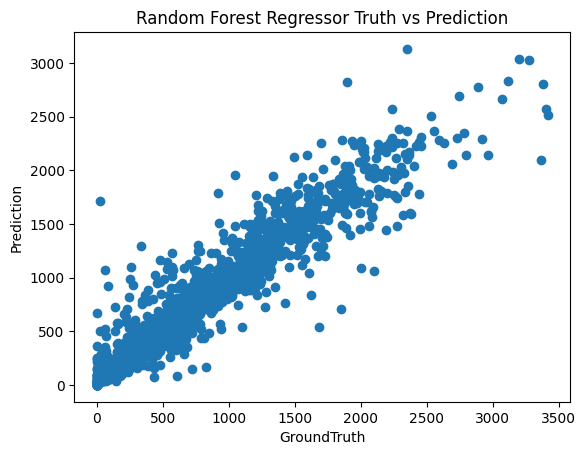

In [237]:
plt.scatter(y_test, y_pred_rfr)
plt.title("Random Forest Regressor Truth vs Prediction")
plt.xlabel("GroundTruth")
plt.ylabel("Prediction")
plt.show()

**End**